### Import required librarires

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

@ Use of Libraries
Pandas: Data Sturucturing and Data Analysis
Numpy: Mathematical functions to operate on these matrices and arrays
Maplotlib:Data Visualization (which helps us plot a variety of graphs and charts so that we can visualise our results easily)
Seaborn: Data Visualization

### Extract Data or Load Data

In [17]:
data = pd.read_csv("D:\\Dataset\\Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Data Analysis or Explore Data

In [23]:
# Let's check the shape of data (Rows and Columns)
data.shape

(30, 2)

In [24]:
# Let's check missing values in present data
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [26]:
# Let's see the statistics of data
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Import Model and Split training and testing data

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [33]:
# Split the dataset into the training set and test set
# We're splitting the data in 1/3, so out of 30 rows, 20 rows will go into the training set,
# and 10 rows will go into the testing set.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30, random_state = 0)

In [ ]:
#Fit the model in linear regression algorithem

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
# Predict the Y values using testing data

In [48]:
y_pred = lr.predict(X_test)

In [53]:
pd.DataFrame({'Actual': y_test, 'Predict': y_pred}).head()

,Actual,Predict
0,37731.0,40817.783270
1,122391.0,123188.082589
2,57081.0,65154.462615
3,63218.0,63282.410357
4,116969.0,115699.873560


### Data Visualization

#### Let’s code for plotting the training set:

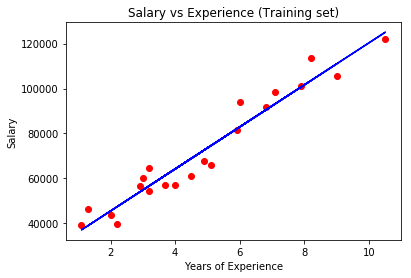

In [46]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

As you can see, the red dots are near the blue line. But there’s definitely some variance. We can tune the model using a variety of techniques, but we’ll keep that for another day.

#### Now let’s look at the plot for the test set, and the code for that is here:

It’s the same code, we just change the variables for the red scatter plot. The graph looks like this:

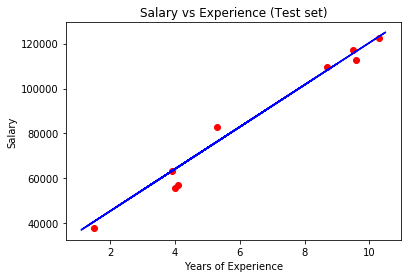

In [51]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [64]:
lr.score(X_test,y_test)

0.9740993407213511

In [66]:
y_pred - y_test

array([ 3086.78327049,   797.08258899,  8073.46261459,    64.41035735,
       -1269.12643996, -1219.33546892,  4000.89968866,  8424.43648597,
       -6701.22384198])

In [68]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [73]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test/1000,y_pred/1000)

In [74]:
print (mse)

23.37007880083295
